In [1]:
# Load all the necessary Libraries

# Base Libraries
import numpy as np
import pandas as pd

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
import datetime as dt

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [2]:
timeseries = pd.read_csv("data_stocks.csv")

In [3]:
timeseries.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


### Extract The following columns
<b>NASDAQ.AAPL<br>
NASDAQ.ADP<br>
NASDAQ.CBOE<br>
NASDAQ.CSCO<br>
NASDAQ.EBAY</b>

In [4]:
timeSeries_Extract = timeseries[["DATE","NASDAQ.AAPL","NASDAQ.ADP","NASDAQ.CBOE","NASDAQ.CSCO","NASDAQ.EBAY"]]

In [5]:
timeSeries_Extract.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


### DATA SANITY CHECKS

In [6]:
# Check if there are any nulls
timeSeries_Extract.isnull().sum().sum()

0

In [7]:
# Check if Nonsense values. Like the values that are less than 0
timeSeries_Extract[timeSeries_Extract<0].any().sum()

0

### CONVERT DATE COLUMN TO DATE

In [8]:
timeSeries_Extract["Date"] = timeSeries_Extract["DATE"].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [9]:
# Drop the original DATE Column
timeSeries_Extract.drop("DATE", axis=1, inplace=True)

In [10]:
# Reset date as the index
timeSeries_Extract = timeSeries_Extract.set_index("Date")

In [11]:
timeSeries_Extract.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
Date,,,,,
2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [12]:
# Check the number of dates there are
timeSeries_Extract.index.value_counts()

# There are about 128 distinct dates

2017-07-06    391
2017-05-03    391
2017-05-19    391
2017-06-08    391
2017-04-27    391
2017-05-12    391
2017-06-29    391
2017-04-19    391
2017-07-14    391
2017-05-25    391
2017-07-20    391
2017-07-27    391
2017-08-04    391
2017-08-24    391
2017-07-19    391
2017-06-07    391
2017-08-10    391
2017-04-28    391
2017-08-31    391
2017-04-26    391
2017-04-07    391
2017-05-18    391
2017-06-30    391
2017-05-05    391
2017-08-23    391
2017-04-12    391
2017-04-25    391
2017-08-02    391
2017-08-03    391
2017-06-01    391
             ... 
2017-05-22    300
2017-04-17    300
2017-07-05    300
2017-07-17    300
2017-05-30    300
2017-05-01    300
2017-07-31    300
2017-07-03    211
2017-04-14     91
2017-07-15     91
2017-08-26     91
2017-06-24     91
2017-04-29     91
2017-08-12     91
2017-07-29     91
2017-04-08     91
2017-04-22     91
2017-05-27     91
2017-05-20     91
2017-08-19     91
2017-06-03     91
2017-09-01     91
2017-05-13     91
2017-06-10     91
2017-05-06

In [13]:
# Check how many distict years there is
timeseries["DATE"].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y')).value_counts()

2017    41266
Name: DATE, dtype: int64

### PLOT THE GRAPH TO SEE IF THE DATA IS STATIONARY OR NON STATIONARY

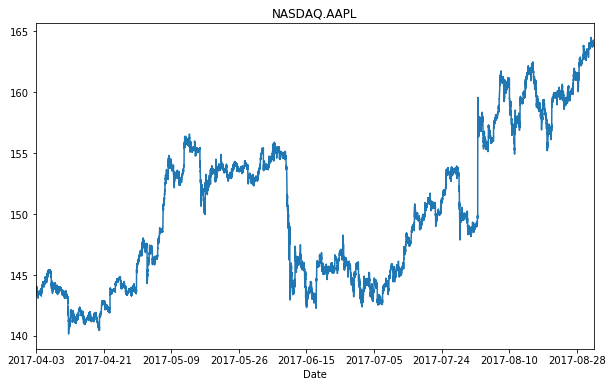

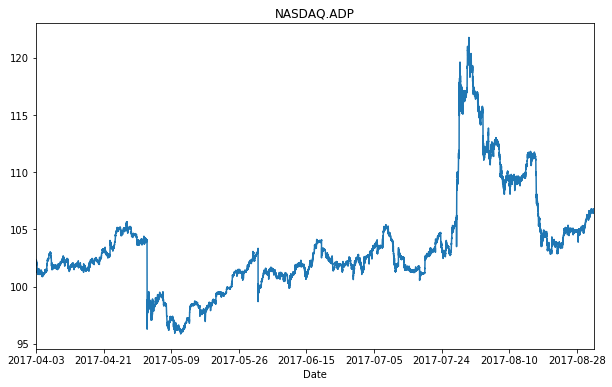

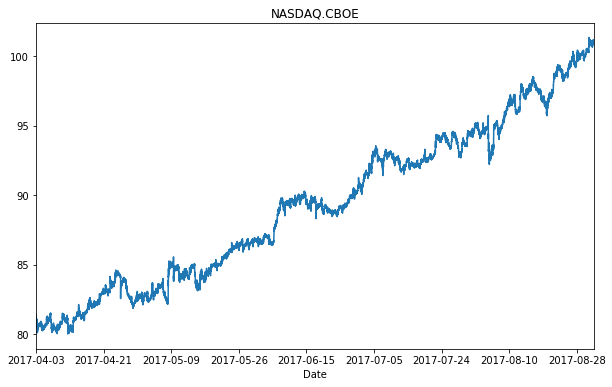

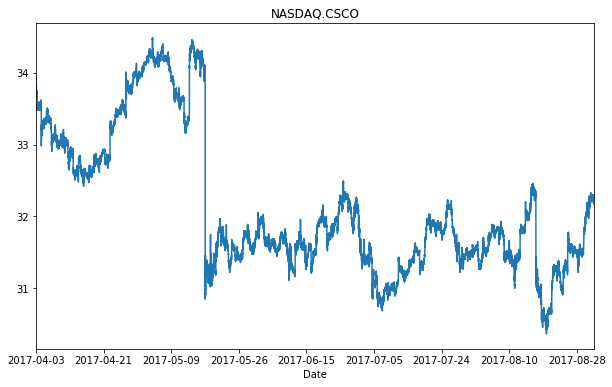

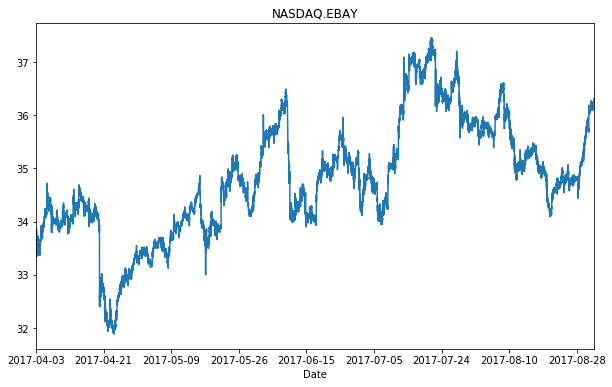

In [14]:
for i in range(0,5):
    plt.figure(figsize=(10,6))
    timeSeries_Extract.iloc[:,i].plot()
    plt.title(timeSeries_Extract.columns[i])

### Conclusion:

Clearly from the visuals the dataset is not Non-Stationary

### DICKEY FULLER MODEL

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import sarimax
import statsmodels

In [16]:
# Create a function to get the p values
def stationary_check(timeseries):
    
    result = adfuller(timeseries)
    
    print ('Augumented Dikey-Fuller Test : ')
    labels = ['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result, labels):
        print (label + ' : ' + str(value))

    if result[1] < 0.05:
        print ("Null Hypothesis Rejected : Data is Stationary")
    else:
        print ("Null Hypothesis Not Rejected : Data is Non Stationary")

In [17]:
# Pull out the values for each
for i in range(0,5):
    print ("***" * 6 + " " + timeSeries_Extract.columns[i] + " " + "***"*6)
    stationary_check(timeSeries_Extract.iloc[:,i])
    print (' ')

****************** NASDAQ.AAPL ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -0.9128532997926634
p-value : 0.7837101772613879
#Lags Used : 31
Number of Observations Used : 41234
Null Hypothesis Not Rejected : Data is Non Stationary
 
****************** NASDAQ.ADP ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -1.7041735251574752
p-value : 0.42896344420668664
#Lags Used : 39
Number of Observations Used : 41226
Null Hypothesis Not Rejected : Data is Non Stationary
 
****************** NASDAQ.CBOE ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : 0.16633930282612888
p-value : 0.9703092030510062
#Lags Used : 27
Number of Observations Used : 41238
Null Hypothesis Not Rejected : Data is Non Stationary
 
****************** NASDAQ.CSCO ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -2.3955546108894694
p-value : 0.14299501995164238
#Lags Used : 47
Number of Observations Used : 41218
Null Hypoth

### Making Series Stationary

<b>Differencing</b><br>
The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [18]:
# Difference of 1
for i in range(0,5):
    col_name = timeSeries_Extract.columns[i] + "diff_1"
    timeSeries_Extract[col_name] = timeSeries_Extract[timeSeries_Extract.columns[i]] - timeSeries_Extract[timeSeries_Extract.columns[i]].shift(1)

In [19]:
timeSeries_Extract.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,NASDAQ.AAPLdiff_1,NASDAQ.ADPdiff_1,NASDAQ.CBOEdiff_1,NASDAQ.CSCOdiff_1,NASDAQ.EBAYdiff_1
Date,,,,,,,,,,
2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975,NaN,NaN,NaN,NaN,NaN
2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950,0.0200,-0.0900,0.18,0.1400,-0.0025
2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100,-0.0099,0.0725,0.00,0.0200,0.0150
2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350,-0.0501,-0.0725,-0.08,-0.0501,-0.0750
2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000,0.0200,-0.0800,-0.01,-0.0099,0.0650


In [20]:
# Compute the P value
# Pull out the values for each
for i in range(5,10):
    print ("***" * 6 + " " + timeSeries_Extract.columns[i] + " " + "***"*6)
    stationary_check(timeSeries_Extract.iloc[:,i].dropna())
    print (' ')

****************** NASDAQ.AAPLdiff_1 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -35.73774148340116
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.ADPdiff_1 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -31.055662244631648
p-value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.CBOEdiff_1 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -41.642093645431686
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 41238
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.CSCOdiff_1 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -30.35668253256657
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.E

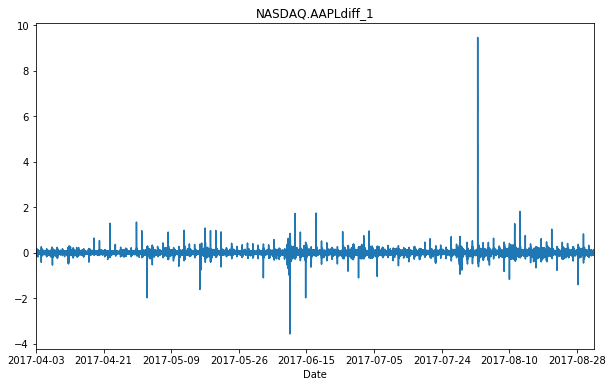

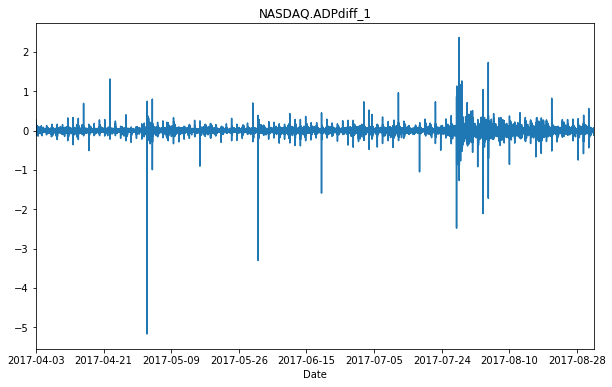

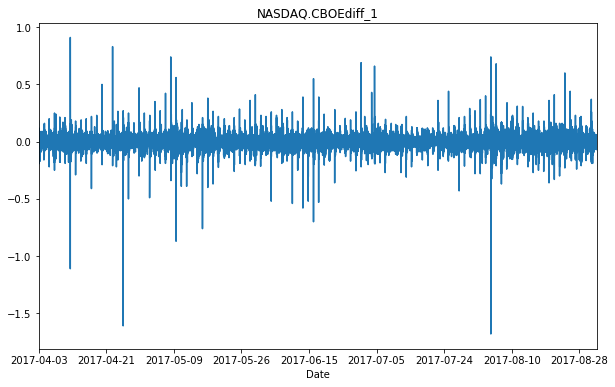

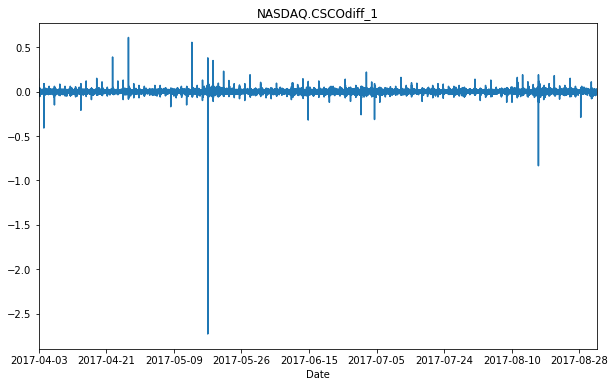

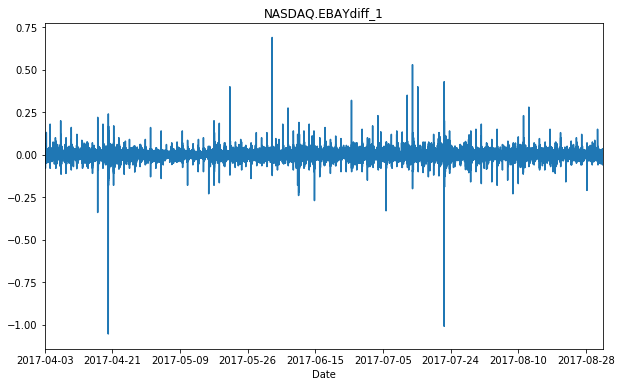

In [21]:
for i in range(5,10):
    plt.figure(figsize=(10,6))
    timeSeries_Extract.iloc[:,i].dropna().plot()
    plt.title(timeSeries_Extract.columns[i])

In [22]:
# Difference of 1
for i in range(0,5):
    col_name = timeSeries_Extract.columns[i] + "_diff_2"
    timeSeries_Extract[col_name] = timeSeries_Extract[timeSeries_Extract.columns[i]] - timeSeries_Extract[timeSeries_Extract.columns[i]].shift(2)

In [24]:
timeSeries_Extract.head()


,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,NASDAQ.AAPLdiff_1,NASDAQ.ADPdiff_1,NASDAQ.CBOEdiff_1,NASDAQ.CSCOdiff_1,NASDAQ.EBAYdiff_1,NASDAQ.AAPL_diff_2,NASDAQ.ADP_diff_2,NASDAQ.CBOE_diff_2,NASDAQ.CSCO_diff_2,NASDAQ.EBAY_diff_2
Date,,,,,,,,,,,,,,,
2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950,0.0200,-0.0900,0.18,0.1400,-0.0025,NaN,NaN,NaN,NaN,NaN
2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100,-0.0099,0.0725,0.00,0.0200,0.0150,0.0101,-0.0175,0.18,0.1600,0.0125
2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350,-0.0501,-0.0725,-0.08,-0.0501,-0.0750,-0.0600,0.0000,-0.08,-0.0301,-0.0600
2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000,0.0200,-0.0800,-0.01,-0.0099,0.0650,-0.0301,-0.1525,-0.09,-0.0600,-0.0100


In [26]:
# Compute the P value
# Pull out the values for each
for i in range(10,15):
    print ("***" * 6 + " " + timeSeries_Extract.columns[i] + " " + "***"*6)
    stationary_check(timeSeries_Extract.iloc[:,i].dropna())
    print (' ')

****************** NASDAQ.AAPL_diff_2 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -27.82538143797731
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41208
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.ADP_diff_2 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -25.879883621905822
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41208
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.CBOE_diff_2 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -25.921621942201284
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41208
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDAQ.CSCO_diff_2 ******************
Augumented Dikey-Fuller Test : 
ADF Test Statistics : -28.0216140727762
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41208
Null Hypothesis Rejected : Data is Stationary
 
****************** NASDA

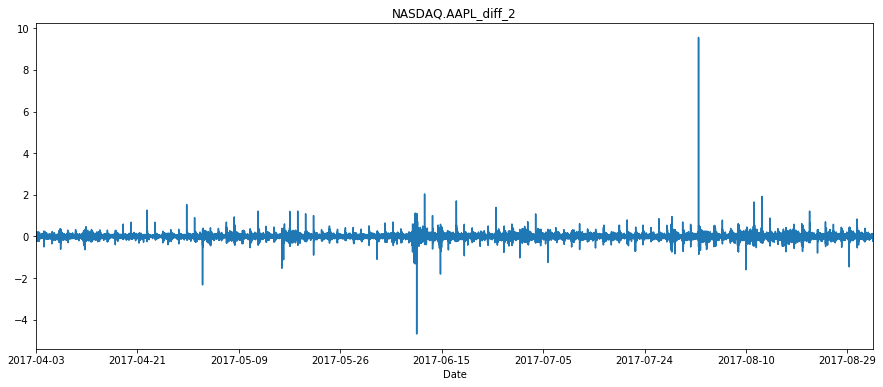

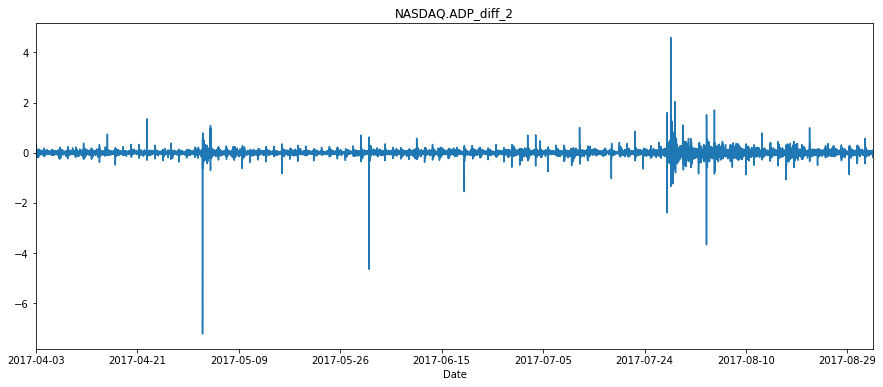

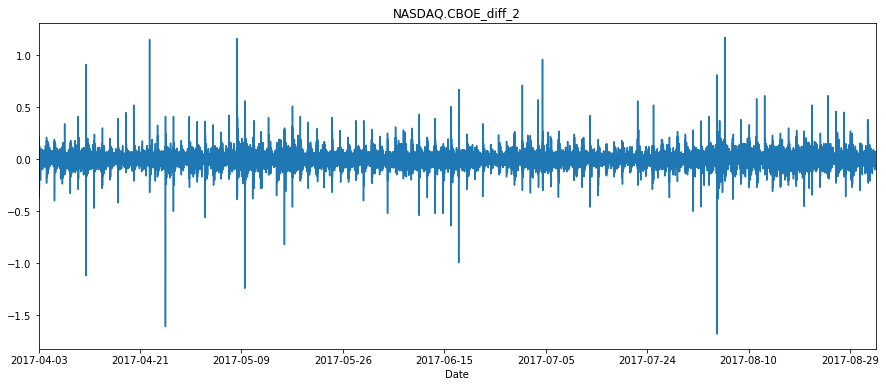

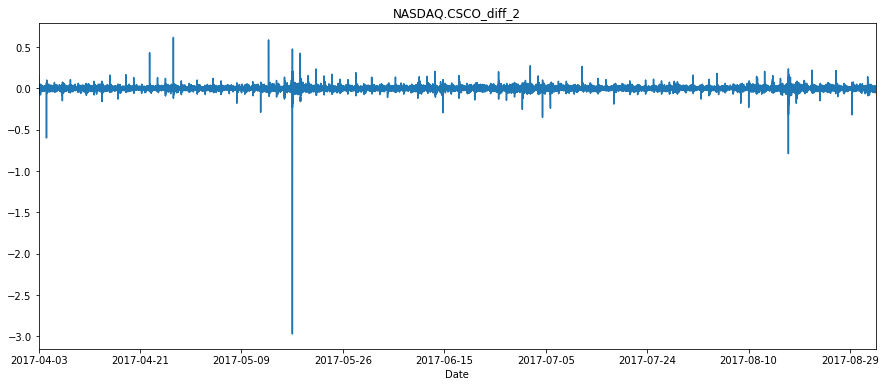

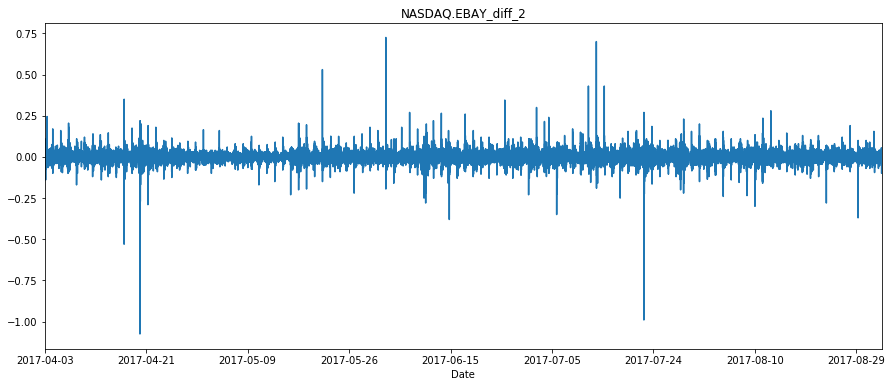

In [31]:
for i in range(10,15):
    plt.figure(figsize=(15,6))
    timeSeries_Extract.iloc[:,i].dropna().plot()
    plt.title(timeSeries_Extract.columns[i])